<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-DA-MSE-data" data-toc-modified-id="Load-DA-MSE-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load DA MSE data</a></span></li><li><span><a href="#Load-training-data" data-toc-modified-id="Load-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load training data</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

C:\Users\julia\Documents\Imperial\DA_project


In [43]:
import pickle
from notebooks import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [215]:
fp1 ="report/figures/augmentation.png"
fp2 ="report/figures/augmentation_nosmooth.png"

### Load DA MSE data

In [5]:
fp = "experiments/TSVD/07b/final.txt"
with open(fp, 'rb') as f:
    res = pickle.load(f)

In [6]:
res

[(0.07320085952996393,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 2)]),
  'experiments/train2/07b/1'),
 (0.07465116493803495,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 4)]),
  'experiments/train2/07b/3'),
 (0.07736139195265253,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prelu'),
               ('aug_scheme', 1)]),
  'experiments/train2/07b/0'),
 (0.07859130053804494,
  OrderedDict([('block_type', 'NeXt'),
               ('mod', 'Tucodec'),
               ('sigmoid', False),
               ('Cstd', 64),
               ('activation', 'prel

### Load training data

In [105]:
exp_dirs = ["experiments/07b/", "experiments/DA3_2/07a/0", "experiments/DA3_2/07a/1"]
results = utils.extract_res_from_files(exp_dirs)

6 experiments conducted


Plot the aug_schemes 0, 3, 4

In [106]:
aug3 = results[2]
aug4 = results[3]
aug0 = results[5]
aug0.keys()

dict_keys(['train_df', 'test_df', 'test_DA_df_final', 'DA_mean_DF', 'settings', 'path', 'model_data'])

In [206]:
schemes = {"0" :aug0, "1": aug3, "2": aug4}
ALPHA_TRAIN = 0.4
ALPHA_TEST = 0.4
for idx, (key, aug) in enumerate(schemes.items()):
    test_df = aug["test_df"].copy()
    train_df = aug["train_df"].copy()
    train_df["Reconstruction MSE"] = train_df["reconstruction_err"].ewm(alpha=ALPHA_TRAIN).mean()
    test_df["Reconstruction MSE"] = test_df["reconstruction_err"].ewm(alpha=ALPHA_TEST).mean()
    test_df["Subset"] = "valid"
    train_df["Subset"] = "train"
    df = pd.concat([test_df, train_df], join='outer')
    df["Aug. Strength"] = key
    df["Epoch"] = df["epoch"]
    if idx == 0:
        Dout = df
    else:
        Dout = pd.concat([df, Dout], join='outer')
Dout.head()   

#     sttn = aug["settings"]
    
#     DA_mean_DF = aug.get("DA_mean_DF")
#     print(DA_mean_DF)
#     asdas
#     model_data = aug["model_data"]
    
#     plt.plot(test_df.epoch, test_df.reconstruction_err, 'ro-')
#     plt.plot(train_df.epoch, train_df.reconstruction_err, 'g+-')
#     plt.grid(True, axis='y', )
#     plt.grid(True, axis='x', )
#     #############################
#     # multiple line plot
    
#     #ax.set_ylabel('MSE loss', color=color1)
#     #ax.tick_params(axis='y', labelcolor=color1)

    
#     #set axes:
#     if ylim1:
#         ax.set_ylim(ylim1[0], ylim1[1])

,Unnamed: 0,epoch,reconstruction_err,DA_MAE,DA_ratio_improve_MAE,time_DA(s),time_epoch(s),Reconstruction MSE,Subset,Aug. Strength,Epoch
0,0,0,159634.496510,6.61629,0.18469,0.11587,73.154207,159634.496510,valid,2,0
1,1,10,3087.659284,0.679931,0.858163,0.116445,73.186038,61792.723244,valid,2,10
2,2,20,2458.526005,0.551353,0.884493,0.137263,80.410876,31520.173632,valid,2,20
3,3,30,2299.245276,0.532852,0.895021,0.140507,85.887145,18091.438174,valid,2,30
4,4,40,1971.713674,0.473408,0.902414,0.146121,86.791437,11099.885216,valid,2,40


In [207]:
"""Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, 
Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,
RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu,
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, 
gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r,
icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r,
ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, 
seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r,
winter, winter_r"""

'Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, \nCMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, \nOranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, \nPiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,\nRdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, \nSet1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu,\nYlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, \nbinary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,\ngist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, \ngist_yarg, gist_yarg_r, 

In [208]:
sns.set_palette()

TypeError: set_palette() missing 1 required positional argument: 'palette'

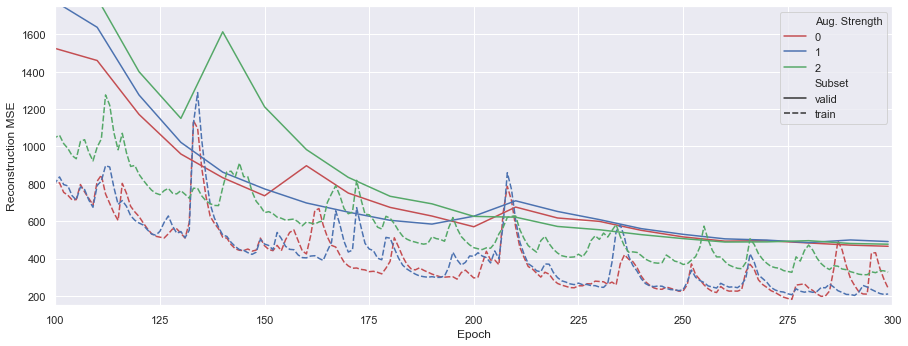

In [211]:
# Plot the responses for different events and regions

ax = sns.lineplot(x="Epoch", y="Reconstruction MSE",
             hue="Aug. Strength", style="Subset", 
             data=Dout, palette=["r", "b", 'g'])
ylim = (150, 1750)
xlim = (100, 300)

ax.set_ylim(ylim[0], ylim[1])
ax.set_xlim(xlim[0], xlim[1])
fig = plt.gcf()
fig.set_size_inches(15, 5.5)

caption:  
\label{fig:augmentation}Graph showing the training and validation MSE reconstruction errors during training with different strengths of augmentation. These graphs have been smoothed with an expoential moving average with $\alpha=0.4$ as the spikes in the training curves made this diagram too noisy to be useful. The non-smoothed version, and details of the specific augmentation strengths are given in Appendix \ref{appendix:augmentation}. 


In [180]:
fig.savefig(fp1)

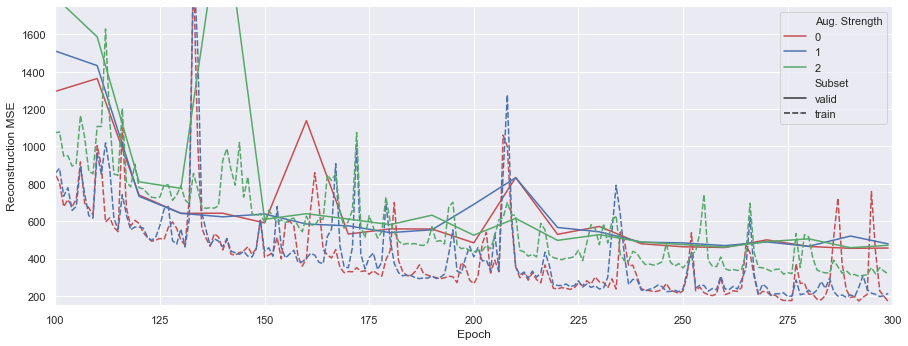

In [216]:
schemes = {"0" :aug0, "1": aug3, "2": aug4}
ALPHA_TRAIN = 1
ALPHA_TEST = 1
for idx, (key, aug) in enumerate(schemes.items()):
    test_df = aug["test_df"].copy()
    train_df = aug["train_df"].copy()
    train_df["Reconstruction MSE"] = train_df["reconstruction_err"].ewm(alpha=ALPHA_TRAIN).mean()
    test_df["Reconstruction MSE"] = test_df["reconstruction_err"].ewm(alpha=ALPHA_TEST).mean()
    test_df["Subset"] = "valid"
    train_df["Subset"] = "train"
    df = pd.concat([test_df, train_df], join='outer')
    df["Aug. Strength"] = key
    df["Epoch"] = df["epoch"]
    if idx == 0:
        Dout = df
    else:
        Dout = pd.concat([df, Dout], join='outer')
Dout.head()   


ax = sns.lineplot(x="Epoch", y="Reconstruction MSE",
             hue="Aug. Strength", style="Subset", 
             data=Dout, palette=["r", "b", 'g'])
ylim = (150, 1750)
xlim = (100, 300)

ax.set_ylim(ylim[0], ylim[1])
ax.set_xlim(xlim[0], xlim[1])
fig = plt.gcf()
fig.set_size_inches(15, 5.5)
fig.savefig(fp2)

\label{fig:aug_nosmooth}Figure \ref{fig:augmentation} repeated without exponential-moving average smoothing. The shape of the graphs are the same as previously but it is much more difficult to see macro patterns. 